In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

file_path = '/content/SIPRI_arms_dataset_2022.csv'


df_2022 = pd.read_csv(file_path)
df_2022.head()

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021)
0,1,1,Lockheed Martin Corp.,United States,59390,60340,65984,90%,65199
1,2,2,Raytheon Technologies,United States,39570,41850,67074,59%,45220
2,3,4,Northrop Grumman Corp.,United States,32300,29880,36602,88%,32286
3,4,3,Boeing,United States,29300,33420,66608,44%,36111
4,5,5,General Dynamics Corp.,United States,28320,27760,39407,72%,29995


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rank (2022)                                  100 non-null    int64 
 1   Rank (2021)                                  100 non-null    int64 
 2   Company                                      100 non-null    object
 3   Country                                      100 non-null    object
 4   Arms Revenue (2022)                          100 non-null    int64 
 5   Arms Revenue (2021)                          100 non-null    int64 
 6   Total Revenue (2022)                         100 non-null    object
 7   Arms Revenue as a % of total revenue (2022)  100 non-null    object
 8   Arms Revenue Adjusted (2021)                 100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [6]:
# After exploring the data and having some hiccups, I realized there were place holders for two rows

df_2022[df_2022['Total Revenue (2022)'] == '. .']

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021)
48,49,51,Bechtel Corp.,United States,2740,2470,. .,. .,2669
55,56,49,General Atomics,United States,2140,2570,. .,. .,2777


In [8]:
df_2022 = df_2022.replace('. .', np.nan)  # Replace placeholders with NaN
df_2022 = df_2022.dropna()  # Drop rows with NaN values

In [9]:
df_2022['Total Revenue (2022)'] = df_2022['Total Revenue (2022)'].astype(np.int64)  # Convert Total Revenue from object to int64
# Convert object with '%' to decimal percent
df_2022['Arms Revenue as a % of total revenue (2022)'] = df_2022['Arms Revenue as a % of total revenue (2022)'].str.rstrip('%').astype(float) / 100.0


In [10]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Rank (2022)                                  98 non-null     int64  
 1   Rank (2021)                                  98 non-null     int64  
 2   Company                                      98 non-null     object 
 3   Country                                      98 non-null     object 
 4   Arms Revenue (2022)                          98 non-null     int64  
 5   Arms Revenue (2021)                          98 non-null     int64  
 6   Total Revenue (2022)                         98 non-null     int64  
 7   Arms Revenue as a % of total revenue (2022)  98 non-null     float64
 8   Arms Revenue Adjusted (2021)                 98 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 7.7+ KB


In [31]:
companies_count = df_2022['Country'].value_counts()  # Count the number of companies per country

companies_count.reset_index()

,Country,count
0,United States,40
1,China,8
2,United Kingdom,7
3,France,5
4,Germany,4
5,Türkiye,4
6,South Korea,4
7,Japan,4
8,Israel,3
9,India,3


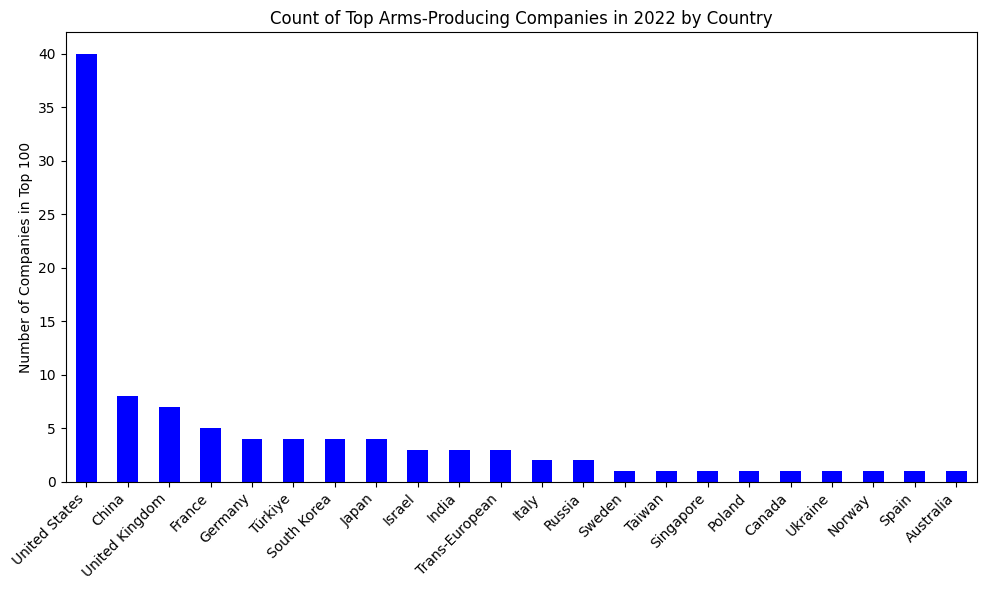

In [32]:
# Creating a bar graph of arms company counts by country

plt.figure(figsize=(10, 6))
companies_count.plot(kind='bar', color='blue')
plt.xlabel('')
plt.ylabel('Number of Companies in Top 100')
plt.title('Count of Top Arms-Producing Companies in 2022 by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<ipython-input-13-fc45707030c5>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


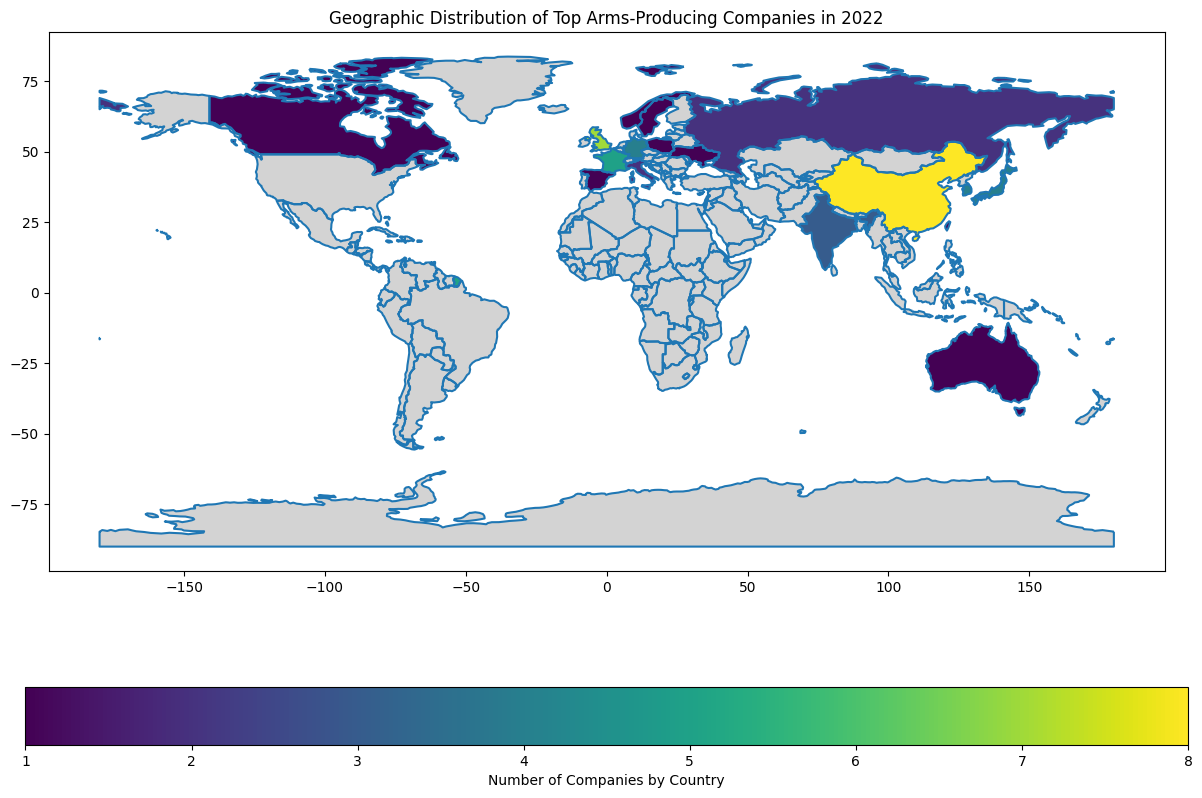

In [13]:
import geopandas as gpd


# Count the number of companies per country
companies_per_country = df['Country'].value_counts().reset_index()
companies_per_country.columns = ['Country', 'Number of Companies']

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the company data with the world map
world = world.merge(companies_per_country, how='left', left_on='name', right_on='Country')

# Plot the world map with the number of companies
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Number of Companies', ax=ax, legend=True,
           legend_kwds={'label': "Number of Companies by Country",
                        'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey"})
plt.title('Geographic Distribution of Top Arms-Producing Companies in 2022')
plt.show()

In [33]:
import plotly.express as px

# Load the cleaned data

# Prepare the data for the sunburst chart
# Aggregate market cap by country and company

# Assuming your dataset has columns 'Country', 'Company', and 'TotalRevenue'
fig = px.sunburst(
    df_2002,
    path=['Country', 'Company'],
    values='Arms Revenue (2022)'
)
#fig.update_layout(title={'x':0.5,'xanchor':'center'})
fig.update_layout(
    title_text='Arms Revenue of Companies by Country in 2022',  # Set the title of the plot
    title_x=0.5,  # Center the title horizontally
    title_font_size=20,  # Set the font size of the title
    width=800,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

#fig.update_traces(rotation=-5)


fig.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df_2002 = pd.read_csv('/content/SIPRI_arms_dataset_2002.csv')


df_2002

,Rank (2002),Company,Country,Arms Revenue (2002),Arms Revenue 2002 (Adjusted),Total Revenue (2002),Arms Revenue as a % of total revenue (2002)
0,1,Boeing,United States,23560,38349,54069,44%
1,2,Northrop Grumman Corp.,United States,21000,34182,22652,93%
2,3,Lockheed Martin Corp.,United States,18870,30715,26578,71%
3,4,BAE Systems,United Kingdom,14070,18627,18233,77%
4,5,Raytheon,United States,12020,19565,16760,72%
...,...,...,...,...,...,...,...
95,96,ADI,Australia,330,697,394,84%
96,97,UMPO,Russia,320,753,341,94%
97,98,Denel,South Africa,320,545,415,77%
98,99,Ultra Electronics Group,United Kingdom,320,424,390,82%


In [16]:

df_2002.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rank (2002)                                  100 non-null    int64 
 1   Company                                      100 non-null    object
 2   Country                                      100 non-null    object
 3   Arms Revenue  (2002)                         100 non-null    int64 
 4   Arms Revenue 2002 (Adjusted)                 100 non-null    int64 
 5   Total Revenue (2002)                         100 non-null    object
 6   Arms Revenue as a % of total revenue (2002)  100 non-null    object
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [38]:
df_2002[df_2002['Total Revenue (2002)'] == '. .']

,Rank (2002),Company,Country,Arms Revenue (2002),Arms Revenue 2002 (Adjusted),Total Revenue (2002),Arms Revenue as a % of total revenue (2002)
24,25,DynCorp,United States,1360,2214,. .,. .
86,87,Raytheon Aerospace Company,United States,370,602,. .,. .


In [40]:
df_2002 = df_2002.replace('. .', np.nan)  # Replace placeholders with NaN
df_2002 = df_2002.dropna()  # Drop rows with NaN values

In [41]:
df_2002['Total Revenue (2002)'] = df_2002['Total Revenue (2002)'].astype(np.int64)  # Convert Total Revenue from object to int64
# Convert object with '%' to decimal percent
df_2002['Arms Revenue as a % of total revenue (2002)'] = df_2002['Arms Revenue as a % of total revenue (2002)'].str.rstrip('%').astype(float) / 100.0



In [42]:
companies_count_2002 = df_2002['Country'].value_counts()

companies_count_2002

Country
United States     40
United Kingdom    11
France             8
Japan              6
Israel             5
Germany            5
Russia             4
India              3
Italy              3
Trans-European     2
South Korea        2
Spain              2
Sweden             1
Singapore          1
Switzerland        1
Canada             1
Norway             1
Australia          1
South Africa       1
Name: count, dtype: int64

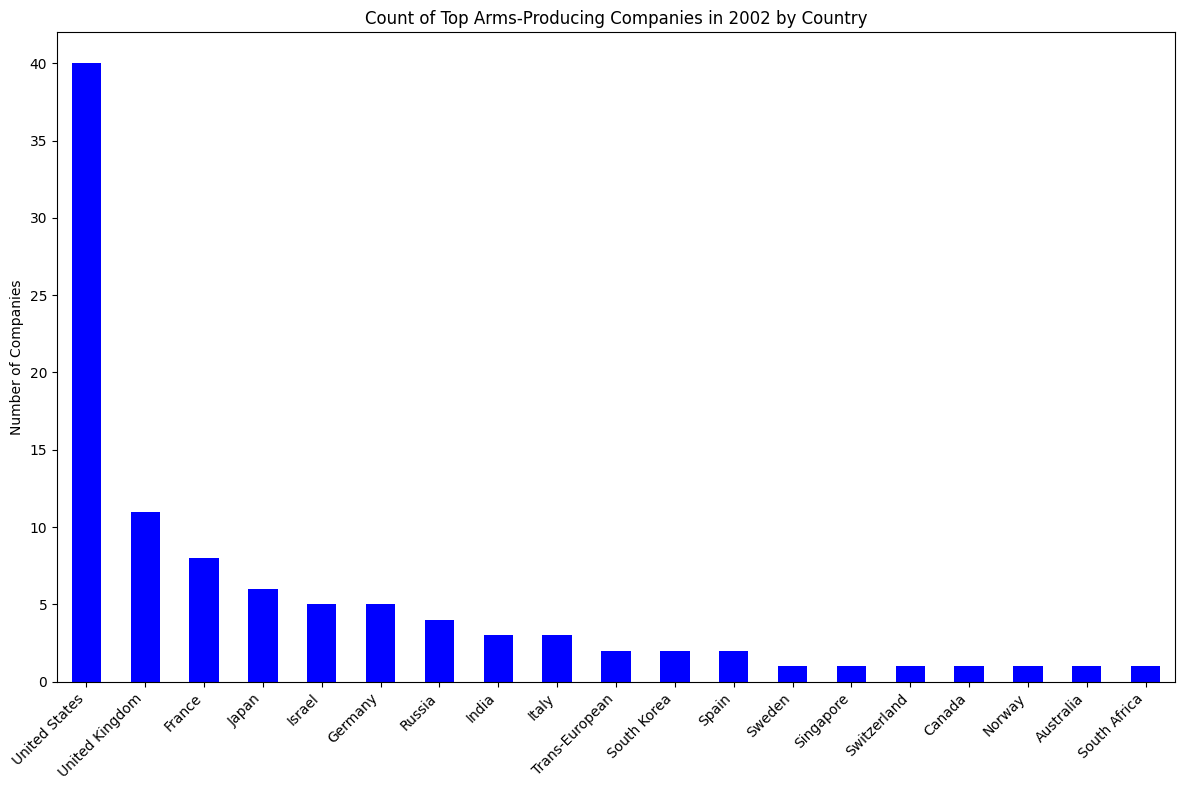

In [43]:
plt.figure(figsize=(12, 8))
companies_count_2002.plot(kind='bar', color='blue')
plt.xlabel('')
plt.ylabel('Number of Companies')
plt.title('Count of Top Arms-Producing Companies in 2002 by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
import plotly.express as px

# Load the cleaned data

# Prepare the data for the sunburst chart
# Aggregate market cap by country and company

# Assuming your dataset has columns 'Country', 'Company', and 'TotalRevenue'
fig = px.sunburst(
    df_2002,
    path=['Country', 'Company'],
    values='Arms Revenue 2002 (Adjusted)'
)
#fig.update_layout(title={'x':0.5,'xanchor':'center'})
fig.update_layout(
    title_text='Arms Revenue of Companies by Country in 2002',  # Set the title of the plot
    title_x=0.5,  # Center the title horizontally
    title_font_size=20,  # Set the font size of the title
    width=800,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

fig.update_traces(rotation=-25)


fig.show()

In [21]:
df['revenue_change'] = ((df['Arms Revenue (2022)']/df['Arms Revenue (2021)'])-1)*100

df

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021),revenue_change
0,1,1,Lockheed Martin Corp.,United States,59390,60340,65984,0.900,65199,-1.574412
1,2,2,Raytheon Technologies,United States,39570,41850,67074,0.590,45220,-5.448029
2,3,4,Northrop Grumman Corp.,United States,32300,29880,36602,0.880,32286,8.099063
3,4,3,Boeing,United States,29300,33420,66608,0.440,36111,-12.327947
4,5,5,General Dynamics Corp.,United States,28320,27760,39407,0.720,29995,2.017291
...,...,...,...,...,...,...,...,...,...,...
95,96,106,TTM Technologies,United States,860,730,2495,0.340,789,17.808219
96,97,99,HEICO Corp.,United States,860,820,2208,0.390,886,4.878049
97,98,101,Hyundai Rotem,South Korea,820,780,2450,0.330,729,5.128205
98,99,104,IHI Corp.,Japan,790,750,10302,0.077,639,5.333333


<ipython-input-22-18fffe309857>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




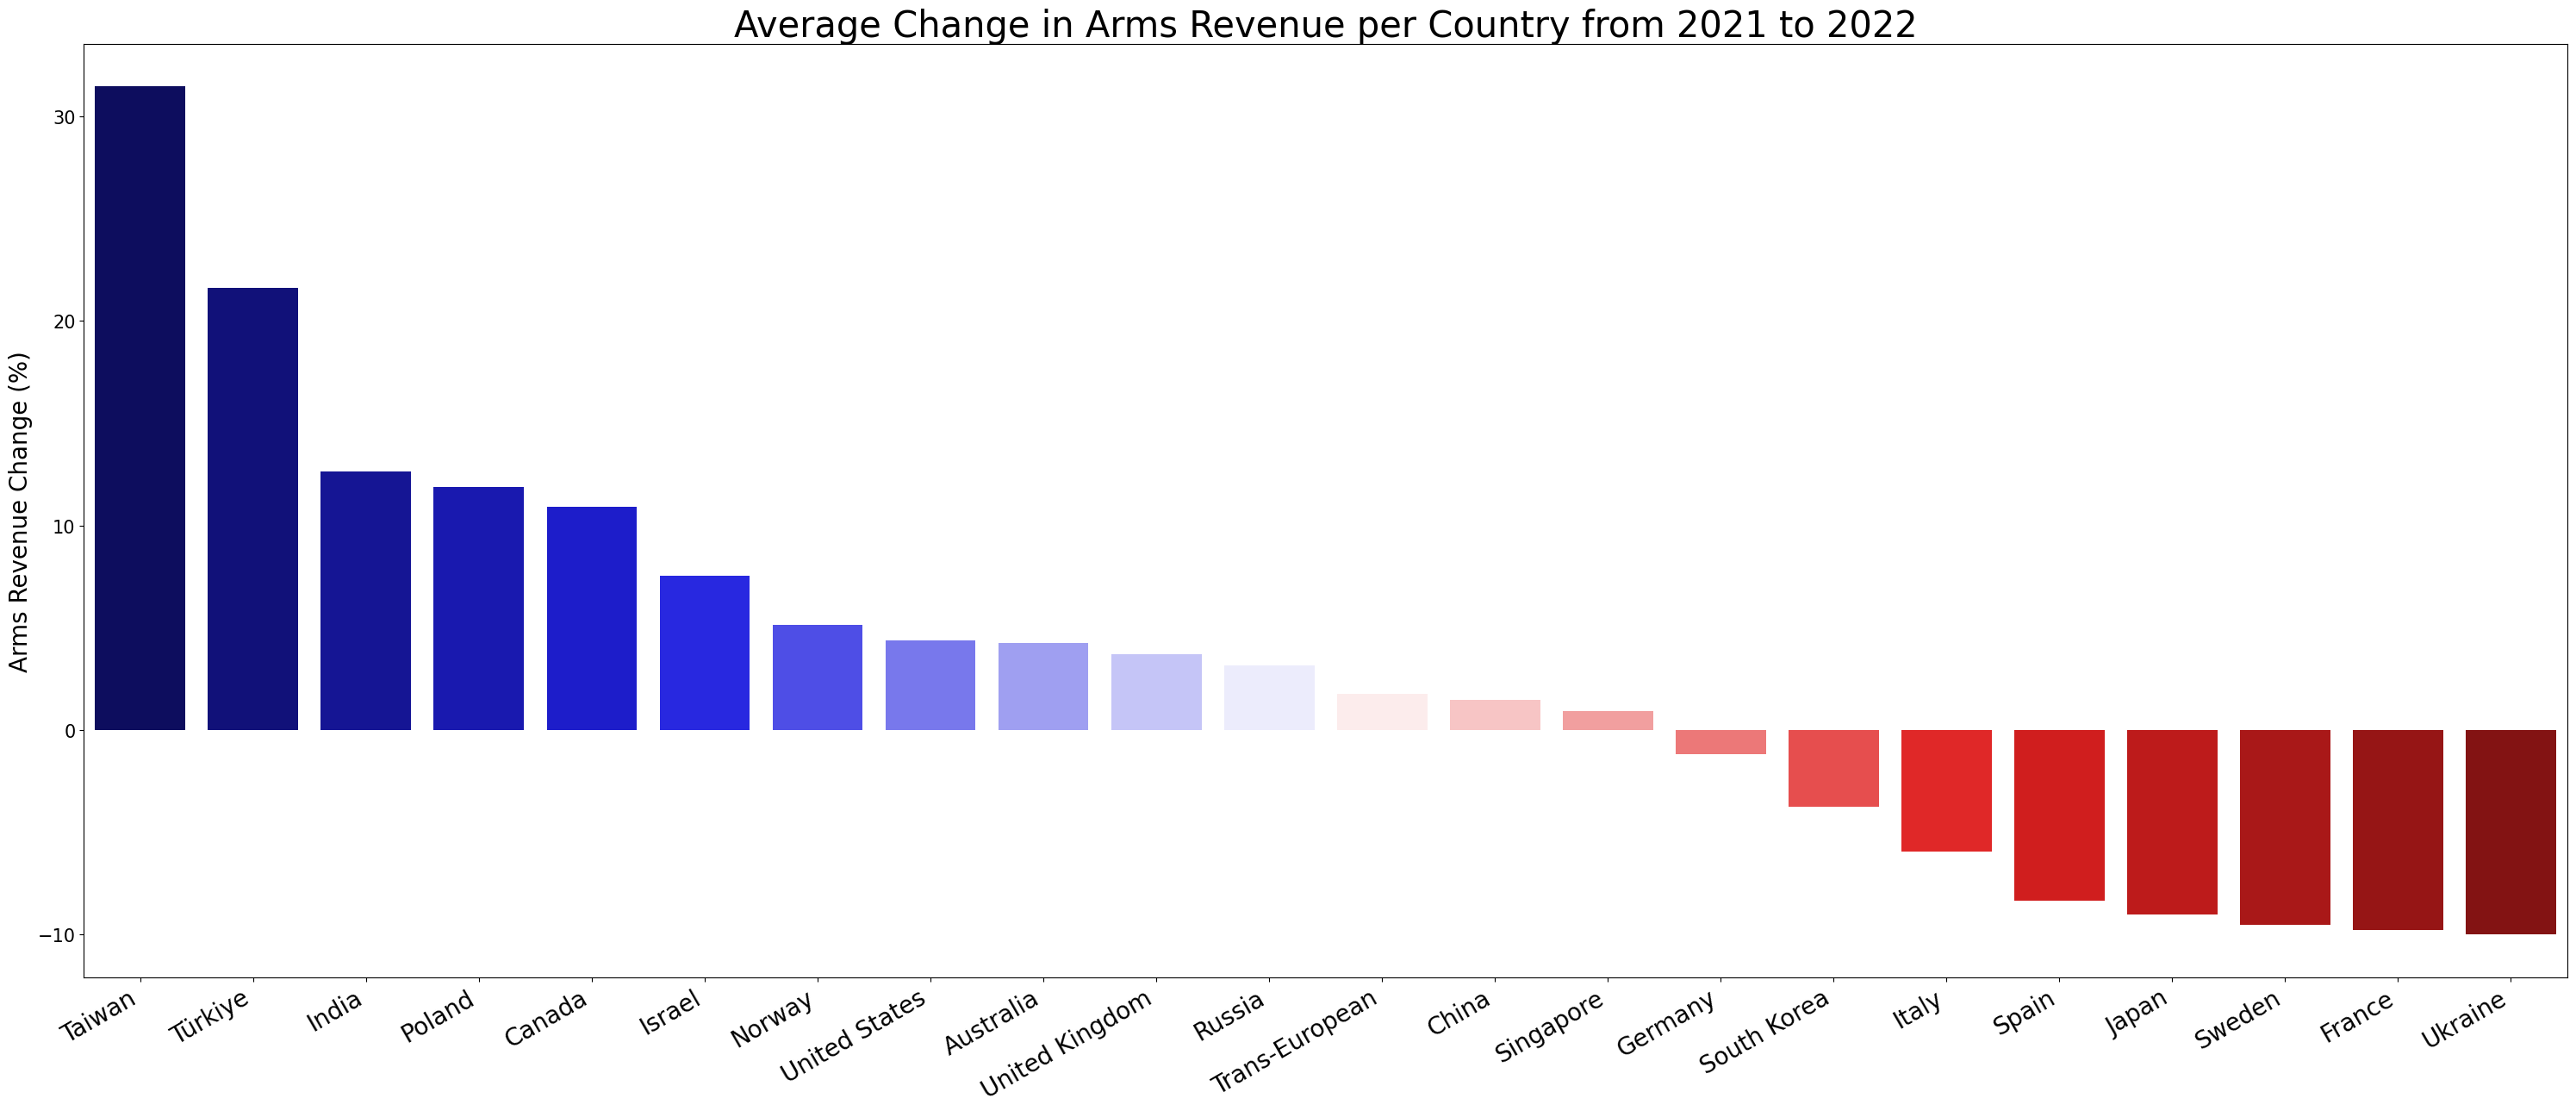

In [22]:
#df_revenue_change = df.drop(,axis=0)
df['revenue_change'] = ((df['Arms Revenue (2022)']/df['Arms Revenue (2021)'])-1)*100

plt.figure(figsize=(30,13))
plt.title('Average Change in Arms Revenue per Country from 2021 to 2022',fontsize=30)
rev_change = df.groupby('Country')['revenue_change'].mean().sort_values(ascending=False)

sns.barplot(x=rev_change.index,y=rev_change, palette='seismic')

plt.ylabel('Arms Revenue Change (%)',fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30, ha='right',fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

<ipython-input-23-e476dc357b63>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




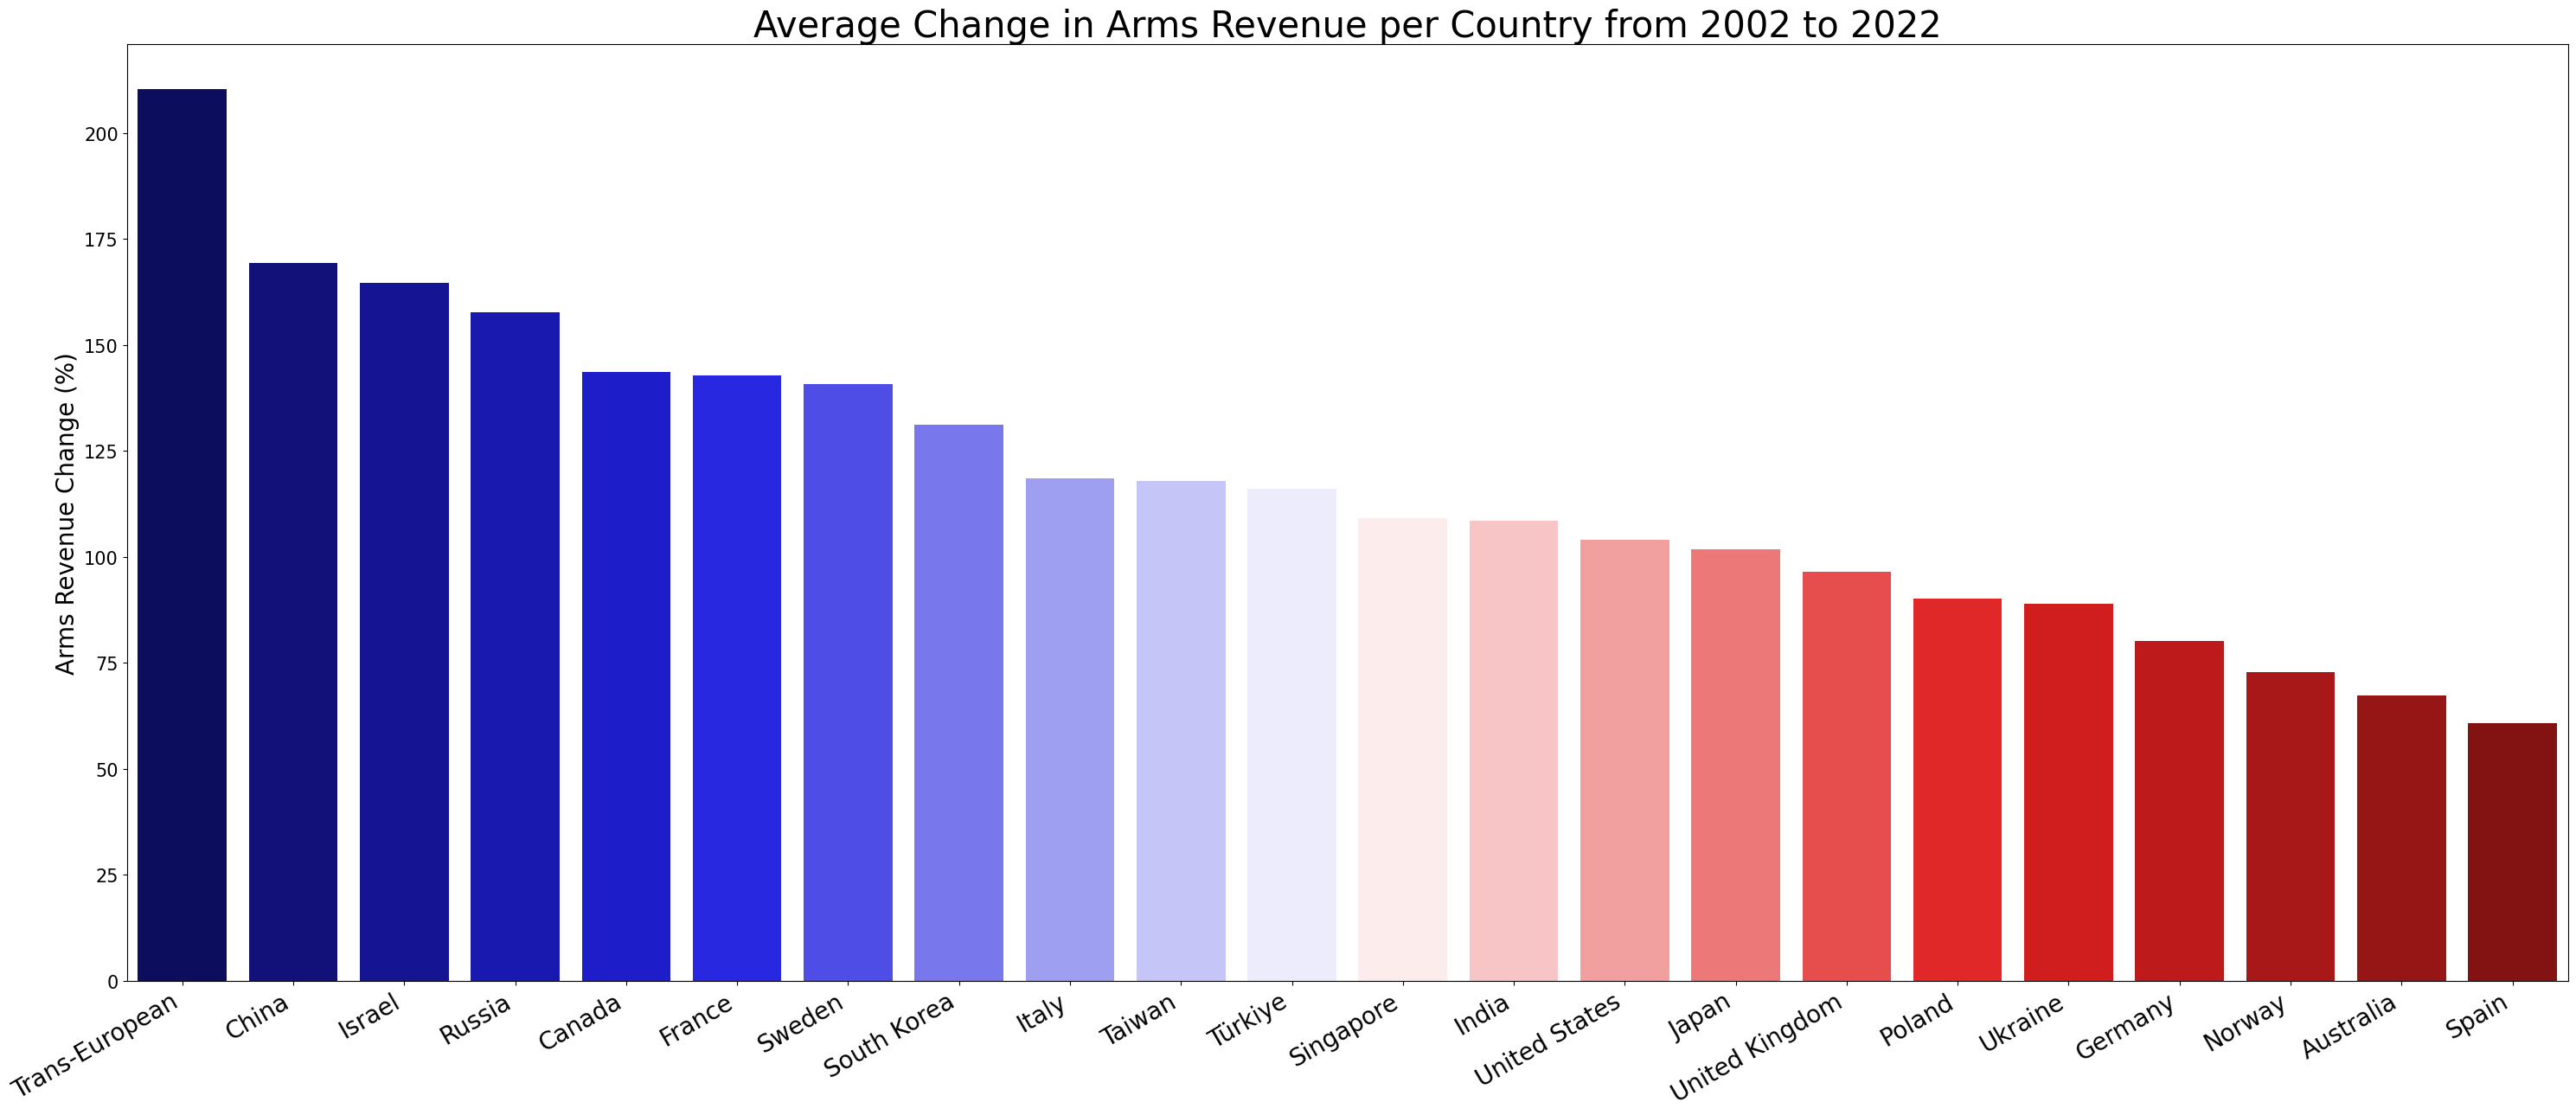

In [23]:
#df_revenue_change = df.drop(,axis=0)
df['revenue_change_total'] = ((df['Arms Revenue (2022)']/df_2002['Arms Revenue 2002 (Adjusted)'])-1)*100

plt.figure(figsize=(30,13))
plt.title('Average Change in Arms Revenue per Country from 2002 to 2022',fontsize=30)
rev_change_total = df.groupby('Country')['revenue_change_total'].mean().sort_values(ascending=False)

sns.barplot(x=rev_change_total.index,y=rev_change_total, palette='seismic')

plt.ylabel('Arms Revenue Change (%)',fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30, ha='right',fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df_total_revenue = pd.read_csv('/content/Total-arms-revenue-2002-2022.csv', header=2, skipfooter=3)
df_total_revenue

<ipython-input-24-3a5b974fefe7>:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



FileNotFoundError: [Errno 2] No such file or directory: '/content/Total-arms-revenue-2002-2022.csv'

In [ ]:
!pip install chardet

import pandas as pd
import chardet

# Detect the encoding of the file
with open('/content/Total-arms-revenue-2002-2022.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file with the detected encoding
file_path = '/content/Total-arms-revenue-2002-2022.csv'
df_total_revenue = pd.read_csv(file_path,encoding=result['encoding'])

df_total_revenue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load the dataset
# file_path = '/mnt/data/Total-arms-revenue-2002-2022.csv'
# data = pd.read_csv(file_path)

# Extract the relevant rows for year and constant 2022 US$ billion
cleaned_df = df_total_revenue.iloc[2:4, 1:-1].copy()

# Rename the rows for better readability
cleaned_df.index = ['Year', 'Constant 2022 US$ Billion']

# Transpose the dataframe to have years as rows
cleaned_df = cleaned_df.transpose()

cleaned_df

In [ ]:
cleaned_df = cleaned_df.dropna()

cleaned_df


In [ ]:
cleaned_df.info()

In [ ]:
cleaned_df['Year'] = cleaned_df['Year'].astype(int)
cleaned_df['Constant 2022 US$ Billion'] = cleaned_df['Constant 2022 US$ Billion'].astype(float)

In [ ]:
# Convert the data to numeric values
# cleaned_df['Year'] = pd.to_numeric(cleaned_df['Year'], errors='coerce').astype(int)
# cleaned_df['Constant 2022 US$ Billion'] = pd.to_numeric(cleaned_df['Constant 2022 US$ Billion'], errors='coerce').astype(float)


# Reset the index
cleaned_df = cleaned_df.reset_index(drop=True)

# Display the cleaned and formatted dataframe
cleaned_df


In [ ]:
# Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Year'], cleaned_df['Constant 2022 US$ Billion'], marker='o')
plt.title('Total Arms Revenue (Constant 2022 US$ Billion) from 2002 to 2022')
plt.xlabel('Year')
plt.ylabel('Constant 2022 US$ Billion')
plt.grid(True)

# Format x-axis to show only the year
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.tight_layout()
plt.show()

In [ ]:

# # Define key events with different styles
# key_events = {
#     '2001': {'name': 'September 11th', 'color': 'grey', 'linestyle': '-'},
#     '2008': {'name': 'Global Financial Crisis', 'color': 'blue', 'linestyle': '--'},
#     '2011': {'name': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
#     '2014': {'name': 'Ukraine Crisis', 'color': 'purple', 'linestyle': ':'},
#     '2017': {'name': 'Trump Presidency', 'color': 'orange', 'linestyle': '-.'},
#     '2020': {'name': 'COVID-19 Pandemic', 'color': 'red', 'linestyle': '-'},
#     '2022': {'name': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
# }

# # Aggregate revenue by year (this is already aggregated in this example)
# yearly_revenue = df.groupby('Year')['Revenue'].sum()

# # Plot revenue with key events
# plt.figure(figsize=(12, 8))
# plt.plot(yearly_revenue.index, yearly_revenue.values, label='Total Revenue for Select Companies', color='black')

# # Add vertical lines for key events with different styles
# for year, event in key_events.items():
#     plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['name'])

# # Customize plot
# plt.title('Impact of Global Events on Defense Contractor Revenue')
# plt.xlabel('Year')
# plt.ylabel('Total Revenue ($USD in Billions)')
# plt.xticks(ticks=np.arange(df['Year'].min(), df['Year'].max() + 1), rotation=45)
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.legend()
# plt.show()


In [ ]:
# Plot the cleaned data

# Define key events with different styles
key_events = {
    '2001': {'name': 'September 11th', 'color': 'grey', 'linestyle': '-'},
    '2008': {'name': 'Global Financial Crisis', 'color': 'blue', 'linestyle': '--'},
    '2011': {'name': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
    '2014': {'name': 'Ukraine Crisis', 'color': 'purple', 'linestyle': ':'},
    '2017': {'name': 'Trump Presidency', 'color': 'orange', 'linestyle': '-.'},
    '2020': {'name': 'COVID-19 Pandemic', 'color': 'red', 'linestyle': '-'},
    '2022': {'name': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
}


plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['Year'], cleaned_df['Constant 2022 US$ Billion'], marker='o')
for year, event in key_events.items():
    plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['name'])

plt.title('Total Arms Revenue (Constant 2022 US$ Billion) from 2002 to 2022')
plt.xlim(2001, 2022)
plt.xlabel('Year')
plt.ylabel('Constant 2022 US$ Billion')

# Format x-axis to show only the year
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.legend()

plt.tight_layout()
plt.show()